# Estimating the CDF and Statistical Functionals

## Empirical distribution function

The **empirical distribution function** $\hat{F_n}$ is the CDF that puts mass $1/n$ at each data point $X_i$.  Formally,
$$
\begin{align}
\hat{F_n}(x) & = \frac{\sum_{i=1}^n I\left(X_i \leq x \right)}{n} \\
&= \frac{\text{\#}| \text{observations less than or equal to x}|}{n}
\end{align}
$$
where

$$
\begin{equation}
I\left(X_i \leq x\right) =
    \begin{cases}
      1   & \text{if } X_i \leq x \\
      0   & \text{if } X_i > x
    \end{cases}       
\end{equation}
$$

**Theorem 8.3**.  At any fixed value of $x$,

$$
\begin{equation}
\mathbb{E}\left( \hat{F_n}(x) \right) = F(x)
\quad\mathrm{and}\quad 
\mathbb{V}\left( \hat{F_n}(x) \right) = \frac{F(x)(1 - F(x))}{n}
\end{equation}
$$

Thus,

$$ \text{MSE} = \frac{F(x)(1 - F(x))}{n} \rightarrow 0 $$

and hence, $\hat{F_n}(x) \xrightarrow{\text{P}} F(x)$.

**Glivenko-Cantelli Theorem**.  Let $X_1, \dots, X_n \sim F$.  Then

$$ \sup _x |\hat{F_n}(x) - F(x)| \xrightarrow{\text{P}} 0 $$

(actually, $\sup _x |\hat{F_n}(x) - F(x)|$ converges to 0 almost surely.)

## Statistical Functionals

A **statistical functional** $T(F)$ is any function of $F$.  Examples are the mean $\mu = \int x dF(x)$, the variance $\sigma^2 = \int (x - \mu)^2 dF(x)$ and the median $m = F^{-1}(1/2)$.

The **plug-in estimator** of $\theta = T(F)$ is defined by

$$\hat{\theta_n} = T(\hat{F_n}) $$

In other words, just plug in $\hat{F_n}$ for the unknown $F$.

A functional of the form $\int r(x) dF(x)$ is called a **linear functional**.  Recall that $\int r(x) dF(x)$ is defined to be $\int r(x) f(x) d(x)$ in the continuous case and $\sum_j r(x_j) f(x_j)$ in the discrete.

The plug-in estimator for the linear functional $T(F) = \int r(x) dF(x)$ is:

$$T(\hat{F_n}) = \int r(x) d\hat{F_n}(x) = \frac{1}{n} \sum_{i=1}^n r(X_i)$$

We have:

$$ T(\hat{F_n}) \approx N\left(T(F), \hat{\text{se}}\right) $$

An approximate $1 - \alpha$ confidence interval for $T(F)$ is then

$$ T(\hat{F_n}) \pm z_{\alpha/2} \hat{\text{se}} $$

We call this the **Normal-based interval**.

## Dvoretsky-Kiefer-Wolfowitz (DKW) inequality

Let $X_1, \dots, X_n$ be iid from $F$.  Then, for any $\epsilon > 0$,

$$\mathbb{P}\left( \sup_x |F(x) - \hat{F_n}(x) | > \epsilon \right) \leq 2 e^{-2n\epsilon^2}$$

From the DKW inequality, we can construct a confidence set.  Let $\epsilon_n^2 = \log(2/\alpha) / (2n)$, $L(x) = \max \{ \hat{F_n}(x) - \epsilon_n, \; 0 \}$ and $U(x) = \min \{\hat{F_n}(x) + \epsilon_n, 1 \}$.  It follows that for any $F$,

$$ \mathbb{P}(F \in C_n) \geq 1 - \alpha $$

To summarize:

A $1 - \alpha$ nonparametric confidence band for $F$ is $(L(x), \; U(x))$ where 

$$
\begin{align}
L(x) &= \max \{ \hat{F_n}(x) - \epsilon_n, \; 0 \} \\
U(x) &= \min \{ \hat{F_n}(x) + \epsilon_n, \; 1 \} \\
\epsilon_n &= \sqrt{\frac{1}{2n} \log \left( \frac{2}{\alpha} \right) }
\end{align}
$$

## Exercises

In [ ]:
import os
REPO_NAME = 'statistics-lab-2024-25'
if not os.path.isdir(REPO_NAME):
    !git clone https://github.com/Engrima18/statistics-lab-2024-25.git

os.chdir(f'{REPO_NAME}/statistics')

### Ex. 1

Generate 100 observations from a $N(0, 1)$ distribution.  Compute a 95 percent confidence band for the CDF $F$.  Repeat this 1000 times and see how often the confidence band contains the true function.  Repeat using data from a Cauchy distribution.

In [1]:
import math
import numpy as np
import pandas as pd
from scipy.stats import norm, cauchy
import matplotlib.pyplot as plt

from tqdm import tqdm

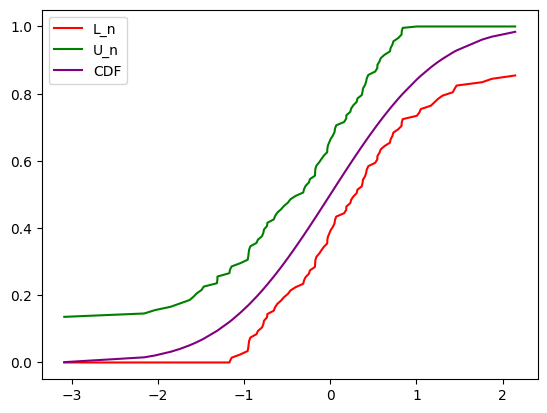

In [2]:
# One iteration wtih Normal distribution

n = 100
alpha = 0.05
r = norm.rvs(size=n)
epsilon = math.sqrt((1 / (2 * n)) * math.log(2 / alpha))

F_n = lambda x : sum(r < x) / n
L_n = lambda x : max(F_n(x) - epsilon, 0)
U_n = lambda x : min(F_n(x) + epsilon, 1)

xx = sorted(r)

df = pd.DataFrame({
    'x': xx, 
    'F_n': np.array(list(map(F_n, xx))), 
    'U_n': np.array(list(map(U_n, xx))), 
    'L_n': np.array(list(map(L_n, xx))), 
    'CDF': np.array(list(map(norm.cdf, xx)))
})
df['in_bounds'] = (df['U_n'] >= df['CDF']) & (df['CDF'] >= df['L_n'])

plt.plot( 'x', 'L_n', data=df, color='red')
plt.plot( 'x', 'U_n', data=df, color='green')
plt.plot( 'x', 'CDF', data=df, color='purple')
plt.legend();

In [3]:
# 1000 iterations with Normal distribution

bounds = []
for k in tqdm(range(1000)):
    n = 100
    alpha = 0.05
    r = norm.rvs(size=n)
    epsilon = math.sqrt((1 / (2 * n)) * math.log(2 / alpha))

    F_n = lambda x : sum(r < x) / n
    L_n = lambda x : max(F_n(x) - epsilon, 0)
    U_n = lambda x : min(F_n(x) + epsilon, 1)

    # xx = sorted(r)
    xx = r # No need to sort without plotting
    
    df = pd.DataFrame({
        'x': xx, 
        'F_n': np.array(list(map(F_n, xx))), 
        'U_n': np.array(list(map(U_n, xx))), 
        'L_n': np.array(list(map(L_n, xx))), 
        'CDF': np.array(list(map(norm.cdf, xx)))
    })
    all_in_bounds = ((df['U_n'] >= df['CDF']) & (df['CDF'] >= df['L_n'])).all()
    bounds.append(all_in_bounds)
    
print('Average fraction in bounds: %.3f' % np.array(bounds).mean())

100%|██████████| 1000/1000 [00:23<00:00, 43.35it/s]

Average fraction in bounds: 0.969


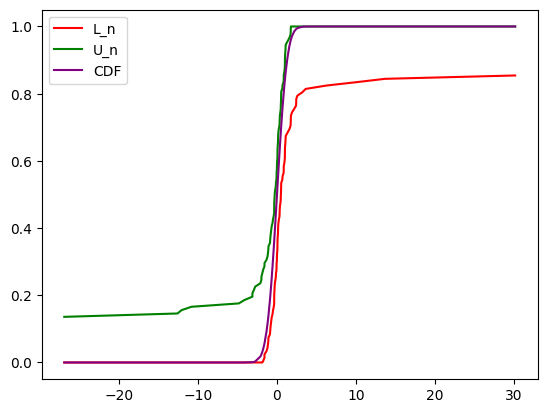

In [4]:
# One iteration wtih Cauchy distribution

n = 100
alpha = 0.05
r = cauchy.rvs(size=n)
epsilon = math.sqrt((1 / (2 * n)) * math.log(2 / alpha))

F_n = lambda x : sum(r < x) / n
L_n = lambda x : max(F_n(x) - epsilon, 0)
U_n = lambda x : min(F_n(x) + epsilon, 1)

xx = sorted(r)

df = pd.DataFrame({
    'x': xx, 
    'F_n': np.array(list(map(F_n, xx))), 
    'U_n': np.array(list(map(U_n, xx))), 
    'L_n': np.array(list(map(L_n, xx))), 
    'CDF': np.array(list(map(norm.cdf, xx)))
})
df['in_bounds'] = (df['U_n'] >= df['CDF']) & (df['CDF'] >= df['L_n'])

plt.plot( 'x', 'L_n', data=df, color='red')
plt.plot( 'x', 'U_n', data=df, color='green')
plt.plot( 'x', 'CDF', data=df, color='purple')
plt.legend()

In [5]:
# 1000 iterations with Cauchy distribution

bounds = []
for k in tqdm(range(1000)):
    n = 100
    alpha = 0.05
    r = cauchy.rvs(size=n)
    epsilon = math.sqrt((1 / (2 * n)) * math.log(2 / alpha))

    F_n = lambda x : sum(r < x) / n
    L_n = lambda x : max(F_n(x) - epsilon, 0)
    U_n = lambda x : min(F_n(x) + epsilon, 1)

    # xx = sorted(r)
    xx = r # No need to sort without plotting

    df = pd.DataFrame({
        'x': xx, 
        'F_n': np.array(list(map(F_n, xx))), 
        'U_n': np.array(list(map(U_n, xx))), 
        'L_n': np.array(list(map(L_n, xx))), 
        'CDF': np.array(list(map(norm.cdf, xx)))
    })
    all_in_bounds = ((df['U_n'] >= df['CDF']) & (df['CDF'] >= df['L_n'])).all()
    bounds.append(all_in_bounds)
    
print('Average fraction in bounds: %.3f' % np.array(bounds).mean())

100%|██████████| 1000/1000 [00:22<00:00, 44.79it/s]

Average fraction in bounds: 0.192


### Ex. 2

Data on the magnitudes of earthquakes near Fiji are available on the course website.  

- Estimate the CDF.
- Compute and plot a 95% confidence envelope for F.
- Find an approximate 95% confidence interval for F(4.9) - F(4.3).

In [6]:
import pandas as pd

data = pd.read_csv('data/fijiquakes.csv', sep='\t')
r = np.array(data['mag'])

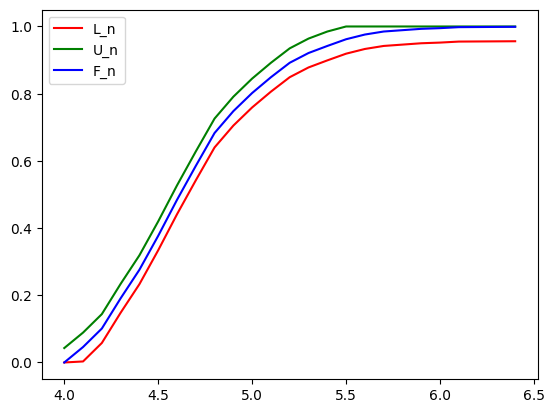

In [7]:
n = len(r)
alpha = 0.05
epsilon = math.sqrt((1 / (2 * n)) * math.log(2 / alpha))

F_n = lambda x : sum(r < x) / n
L_n = lambda x : max(F_n(x) - epsilon, 0)
U_n = lambda x : min(F_n(x) + epsilon, 1)

xx = sorted(r)

df = pd.DataFrame({
    'x': xx, 
    'F_n': np.array(list(map(F_n, xx))), 
    'U_n': np.array(list(map(U_n, xx))), 
    'L_n': np.array(list(map(L_n, xx)))
})

plt.plot( 'x', 'L_n', data=df, color='red')
plt.plot( 'x', 'U_n', data=df, color='green')
plt.plot( 'x', 'F_n', data=df, color='blue')
plt.legend()

In [8]:
# Now to find the confidence interval, using the result from 8.5.6:

import math
from scipy.stats import norm

z_95 = norm.ppf(.975)
theta = F_n(4.9) - F_n(4.3)
se = math.sqrt(theta * (1 - theta) / n)

print('95%% confidence interval: (%.3f, %.3f)' % ((theta - z_95 * se), (theta + z_95 * se)))

95% confidence interval: (0.526, 0.588)


### Ex. 3

Get the data on eruption times and waiting times between eruptions of the old faithful geyser from the course website.

- Estimate the mean waiting time and give a standard error for the estimate.
- Also, give a 90% confidence interval for the mean waiting time.
- Now estimate the median waiting time.

In the next chapter we will see how to get the standard error for the median.

In [20]:
import numpy as np
import pandas as pd

data = pd.read_csv('data/geysers.csv', sep=',')
r = np.array(data['waiting'])

In [24]:
# Estimate the mean waiting time and give a standard error for the estimate.
theta = r.mean()
se = np.std(r, ddof=1) / np.sqrt(len(r))

## Alternatively:
# from scipy.stats import sem
# se = sem(r)

print("Estimated mean: %.3f" % theta)
print("Estimated SE: %.3f" % se)

Estimated mean: 70.897
Estimated SE: 0.824


In [25]:
# Also, give a 90% confidence interval for the mean waiting time.
from scipy.stats import norm

z_90 = norm.ppf(.95)

print('90%% confidence interval: (%.3f, %.3f)' % ((theta - z_90 * se), (theta + z_90 * se)))

90% confidence interval: (69.541, 72.253)


In [26]:
# Now estimate the median time
median = np.median(r)

print("Estimated median time: %.3f" % median)

Estimated median time: 76.000


### Ex. 4

100 people are given a standard antibiotic to treat an infection and another 100 are given a new antibiotic.  In the first group, 90 people recover; in the second group, 85 people recover.  Let $p_1$ be the probability of recovery under the standard treatment, and let $p_2$ be the probability of recovery under the new treatment.  We are interested in estimating $\theta = p_1 - p_2$.  Provide an estimate, standard error, an 80% confidence interval and a 95% confidence interval for $\theta$.

**Solution**. Let $X_1, \dots, X_100$ be indicator random variables (0 or 1) determining recovery on the first group, and $Y_1, \dots, Y_100$ indicating recovery on the second group. From the problem formulation, we can assume $X_i \sim \text{Bernoulli}(p_1)$ and $Y_i \sim \text{Bernoulli}(p_2)$. $n_1 = n_2 = 100$, so we can use $n$ to refer to both.

If $\theta = p_1 - p_2$, then from exercise 8.5.2:

$$\hat{\theta} = \hat{p_1} - \hat{p_2}$$

$$\text{se}(\hat{\theta}) = \sqrt{\frac{\hat{p_1}(1 - \hat{p_1})}{n} + \frac{\hat{p_2}(1 - \hat{p_2})}{n}}$$

In [27]:
p_hat_1 = 0.9
p_hat_2 = 0.85
n = 100

theta_hat = p_hat_1 - p_hat_2
se_theta_hat = np.sqrt((p_hat_1 * (1 - p_hat_1) + p_hat_2 * (1 - p_hat_2)) / n)

print('Estimated mean: %.3f' % theta_hat)
print('Estimated SE: %.3f'   % se_theta_hat)

Estimated mean: 0.050
Estimated SE: 0.047


In [28]:
from scipy.stats import norm

z_80 = norm.ppf(.9)
z_95 = norm.ppf(.975)

print('80%% confidence interval: (%.3f, %.3f)' % ((theta_hat - z_80 * se_theta_hat), (theta_hat + z_80 * se_theta_hat)))
print('95%% confidence interval: (%.3f, %.3f)' % ((theta_hat - z_95 * se_theta_hat), (theta_hat + z_95 * se_theta_hat)))

80% confidence interval: (-0.010, 0.110)
95% confidence interval: (-0.041, 0.141)


### Ex. 5

In 1975, an experiment was conducted to see if cloud seeding produced rainfall.  26 clouds were seeded with silver nitrate and 26 were not.  The decision to seed or not was made at random.  Get the data from the provided link.

Let $\theta$ be the difference in the median precipitation from the two groups.

- Estimate $\theta$.
- Estimate the standard error of the estimate and produce a 95% confidence interval.

In [15]:
import numpy as np
import pandas as pd
from tqdm import tqdm

data = pd.read_csv('data/cloud_seeding.csv', sep=',')
X = data['Seeded_Clouds']
Y = data['Unseeded_Clouds']

In [16]:
theta_hat = X.median() - Y.median()

print('Estimated mean: %.3f' % theta_hat)

Estimated mean: 177.400


In [17]:
# Using bootstrap

nx = len(X)
ny = len(Y)

B = 10000
t_boot = np.zeros(B)
for i in tqdm(range(B)):
    xx = X.sample(n=nx, replace=True)
    yy = Y.sample(n=ny, replace=True)
    t_boot[i] = xx.median() - yy.median()
    
se = np.array(t_boot).std()

print('Estimated SE: %.3f' % se)

100%|██████████| 10000/10000 [00:07<00:00, 1269.22it/s]

Estimated SE: 63.991


In [ ]:
from scipy.stats import norm

z_95 = norm.ppf(.975)

normal_conf = (theta_hat - z_95 * se, theta_hat + z_95 * se)
percentile_conf = (np.quantile(t_boot, .025), np.quantile(t_boot, .975))
pivotal_conf = (2*theta_hat - np.quantile(t_boot, 0.975), 2*theta_hat - np.quantile(t_boot, .025))

print('95%% confidence interval (Normal): \t %.3f, %.3f' % normal_conf)
print('95%% confidence interval (percentile): \t %.3f, %.3f' % percentile_conf)
print('95%% confidence interval (pivotal): \t %.3f, %.3f' % pivotal_conf)

95% confidence interval (Normal): 	 51.980, 302.820
95% confidence interval (percentile): 	 37.450, 263.950
95% confidence interval (pivotal): 	 90.850, 317.350


## Source

Material adapted from the book [All of statistics](https://link.springer.com/book/10.1007/978-0-387-21736-9) by Larry Wassermann
> Credits for the exercise solution [Telmo Correa](https://github.com/telmo-correa/all-of-statistics)